# Davenports Q-method

Represents a class of filters based on _Wahba's formulation_ of the rotation problem.

Redefines the problem as an optimization (maximization of a gain function).



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ahrs import filters

# Requires the magnetic dip and gravitational inclination.
# Defaults to Munich

sample_rate = 1000

from test_data.import_data import get_data, get_gt

acc, _, mag = get_data()

davenport = filters.Davenport(frequency=sample_rate, frame='NED')

In [2]:
from test_data.import_data import get_data, get_gt

acc, _, mag = get_data()

In [3]:
estimations = np.empty((len(acc), 4))
estimations[0] = [1., 0., 0., 0.]

for i in range(1, len(acc)):
    estimations[i] = davenport.estimate(acc=acc[i], mag=mag[i])

In [4]:
def clamp_to_360(x):
    x = np.mod(x, 360)
    return x

In [5]:
from utils import quaternion_to_euler

phi_hat, theta_hat, psi_hat = quaternion_to_euler(estimations)

phi_hat = clamp_to_360(phi_hat)
theta_hat = clamp_to_360(theta_hat)
psi_hat = clamp_to_360(psi_hat)

phi, theta, psi = quaternion_to_euler(get_gt())

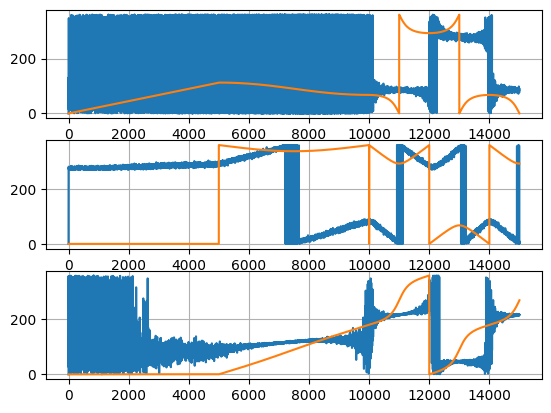

In [6]:
%matplotlib inline

plt.subplot(3, 1, 1)
plt.plot(phi_hat)
plt.plot(phi)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(theta_hat)
plt.plot(theta)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(psi_hat)
plt.plot(psi)
plt.grid()

plt.show()